# I4C Team 25049 Mindpetal Metro Ridershop Data Analysis

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Document outline:
- download the data
- convert to data frame
- checking shape, features, outliers, missing data, etc (initial thought: might have to change 0.1K to 1000 etc)
- graphs
- beautiful graphs
- next: look at additional datasets & see what connections we can find
- end results: we have found out x about the trends and y about why it happens


we'll have to look at the map & see what the metro stops are like

additional datasets for later:

There are many open datasets you can access at places such as:
• https://opendata.maryland.gov/ (each state will have similar open data)
• https://www.data.gov/
• https://datascience.nih.gov/covid-19-open-access-resources
• https://www.transportation.gov/data

https://www.weather.gov/wrh/Climate?wfo=lwx


In [3]:
df= pd.read_csv('/content/drive/MyDrive/data.csv')

In [4]:
df = df.sort_values('Date')
df['DOW'] = ""

In [5]:
df.loc[df["Date"]=="M06", ["DOW"]] = "Wednesday"
df.loc[df["Date"]=="M23", ["DOW"]] = "Saturday"
df.loc[df["Date"]=="J05", ["DOW"]] = "Wednesday"
df.loc[df["Date"]=="J15", ["DOW"]] = "Saturday"
df.loc[df["Date"]=="S04", ["DOW"]] = "Wednesday"
df.loc[df["Date"]=="S21", ["DOW"]] = "Saturday"
df.loc[df["Date"]=="D04", ["DOW"]] = "Wednesday"
df.loc[df["Date"]=="D21", ["DOW"]] = "Saturday"

In [6]:
df["Temp"]=0.0
df.loc[df["Date"]=="M06", ["Temp"]] = 53.0
df.loc[df["Date"]=="M23", ["Temp"]] = 46.5
df.loc[df["Date"]=="J05", ["Temp"]] = 77.5
df.loc[df["Date"]=="J15", ["Temp"]] = 77.5
df.loc[df["Date"]=="S04", ["Temp"]] = 68.0
df.loc[df["Date"]=="S21", ["Temp"]] = 75.5
df.loc[df["Date"]=="D04", ["Temp"]] = 37.0
df.loc[df["Date"]=="D21", ["Temp"]] = 35.0

In [7]:
def remove_k(x):
  end = len(x) - 1
  x = x[0:end]
  return x

df['Avg Daily Entries'] = df['Avg Daily Entries'].apply(remove_k)
df['Avg Daily Entries'] = df['Avg Daily Entries'].astype(float)



In [8]:
dss = pd.DataFrame()

dss['Date'] =df['Date'].unique()
dss['rider']=0.0
for i in df['Date'].unique():
  num = df.loc[df['Date']==i]['Avg Daily Entries'].sum()
  dss.loc[dss['Date']==i,['rider']]= num

In [9]:
def MyFn(s):
  ret = []
  dic = {"M06":1,"M23":2,"J05":3,"J15":4,"S04":5,"S21":6,"D04":7,"D21":9}
  for i in s:
    ret.append(dic[i])
  return ret

In [10]:
dss = dss.sort_values(by = "Date", key = MyFn)

In [11]:
dss["Dates"] = ["Mar 6","Mar 23","Jun 5","Jun 15","Sep 4","Sep 21","Dec 4","Dec 21"]

In [12]:
dss['DOW']=["Wednesday","Saturday","Wednesday","Saturday","Wednesday","Saturday","Wednesday","Saturday",]


In [13]:
dss

,Date,rider,Dates,DOW
4,M06,432.1,Mar 6,Wednesday
5,M23,261.7,Mar 23,Saturday
2,J05,452.6,Jun 5,Wednesday
3,J15,282.2,Jun 15,Saturday
6,S04,427.7,Sep 4,Wednesday
7,S21,289.6,Sep 21,Saturday
0,D04,454.7,Dec 4,Wednesday
1,D21,202.7,Dec 21,Saturday


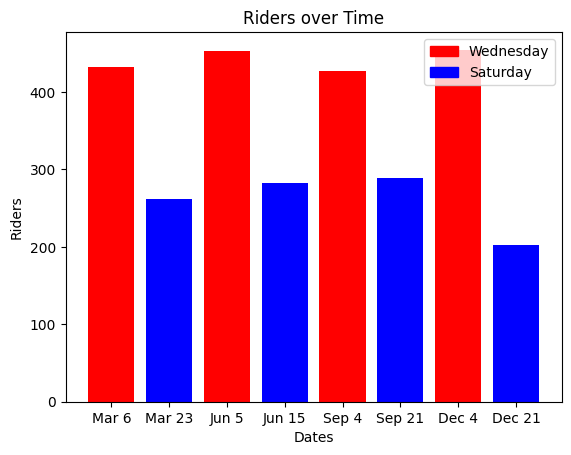

In [14]:
plt.bar(dss["Dates"],dss['rider'],color = dss['DOW'].map({"Wednesday":"red","Saturday":"blue"}))


plt.title("Riders over Time")
plt.xlabel('Dates')
plt.ylabel('Riders')
import matplotlib.patches as mpatches

red_patch = mpatches.Patch(color='red', label='Wednesday')
blue_patch = mpatches.Patch(color='blue', label='Saturday')
plt.legend(handles=[red_patch,blue_patch])
plt.show()


In [18]:
df.to_csv("dt.csv")

In [53]:
df["Date"].unique()


array(['D04', 'D21', 'J05', 'J15', 'M06', 'M23', 'S04', 'S21'],
      dtype=object)

In [54]:
df["Time Period"].unique()


array(['Late Night (12am-Close)', 'Midday (9:30am-3pm)',
       'PM Peak (3pm-7pm)', 'AM Peak (Open-9:30am)', 'Evening (7pm-12am)'],
      dtype=object)

In [33]:
p = df.copy(deep=True)

p= p.drop(columns=["Unnamed: 0"])
p.head()

,Station Name,Time Period,Avg Daily Entries,Date,DOW,Temp
0,Woodley Park,Late Night (12am-Close),0.0,D04,Wednesday,37.0
334,Minnesota Ave,Midday (9:30am-3pm),0.5,D04,Wednesday,37.0
333,Morgan Boulevard,Midday (9:30am-3pm),0.2,D04,Wednesday,37.0
332,Mt Vernon Sq,Midday (9:30am-3pm),0.8,D04,Wednesday,37.0
331,Navy Yard-Ballpark,Midday (9:30am-3pm),1.4,D04,Wednesday,37.0


In [83]:
ft = pd.DataFrame([])
for i in p['Time Period'].unique():
  for ii in p['Date'].unique():
    num = p.loc[(p['Time Period']==i) & (p['Date'] == ii)]['Avg Daily Entries'].sum()
    date = ii
    tp = i
    riders= num
    dow = p.loc[(p['Date'] == ii)]['DOW'].unique()[0]
    temp = p.loc[(p['Date'] == ii)]['Temp'].unique()[0]
    dic = pd.DataFrame([{"Date":date,"Time Period":tp,"Riders":riders,"DOW":dow,"Temp":temp}])
    ft = pd.concat([ft,dic])


In [34]:
import seaborn as sns

In [90]:
ft.head()

,Date,Time Period,Riders,DOW,Temp
0,D04,Late Night (12am-Close),0.2,Wednesday,37.0
0,D21,Late Night (12am-Close),1.5,Saturday,35.0
0,J05,Late Night (12am-Close),0.1,Wednesday,77.5
0,J15,Late Night (12am-Close),2.7,Saturday,77.5
0,M06,Late Night (12am-Close),0.2,Wednesday,53.0


In [ ]:
fig,ax = plt.subplots(figsize=(13,10))
df_heatmap = ft.pivot_table(values='Riders',index='Date',columns='Time Period',aggfunc=np.mean)
sns.heatmap(df_heatmap,annot=True)
plt.show()

In [93]:
ft.head()

,Date,Time Period,Riders,DOW,Temp
0,D04,Late Night (12am-Close),0.2,Wednesday,37.0
0,D21,Late Night (12am-Close),1.5,Saturday,35.0
0,J05,Late Night (12am-Close),0.1,Wednesday,77.5
0,J15,Late Night (12am-Close),2.7,Saturday,77.5
0,M06,Late Night (12am-Close),0.2,Wednesday,53.0
